# 3.3

In [3]:
def print_func_name(func):
    def wrapper(*args, **kwargs):
        print(func.__name__)        
        return func(*args, **kwargs)
    return wrapper

logistic_model
initialize_beta
update_parameters_gradDesc
gradient
sigmoid
J_cost
0th iteration, cost is 12.218672214443876
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
J_cost
10th iteration, cost is 10.617241248040324
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
gradient
sigmoid
J_cost
8.687180339238743


C:\Users\manlab\anaconda3\envs\aiprice\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manlab\anaconda3\envs\aiprice\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manlab\anaconda3\envs\aiprice\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21547 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manlab\anaconda3\envs\aiprice\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31958 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manlab\anaconda3\envs\aiprice\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manlab\anaconda3\envs\aiprice\lib\site-package

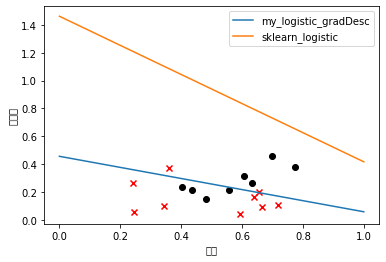

In [4]:
'''
与原书不同，原书中一个样本xi 为列向量，本代码中一个样本xi为行向量
尝试了两种优化方法，梯度下降和牛顿法。两者结果基本相同，不过有时因初始化的原因，
会导致牛顿法中海森矩阵为奇异矩阵，np.linalg.inv(hess)会报错。以后有机会再写拟牛顿法吧。

원서와 달리 원서의 샘플xi는 열 벡터, 이 코드에서 샘플xi는 행 벡터를 위한 두 가지 최적화 방법을 시도했다.
둘의 결과는 거의 같으나, 초기화로 인해 뉴턴법에서 하이젠 행렬이 기이한 행렬로 나타나 np.linalg.inv(hess)가 틀리게 되는 경우도 있다.나중에 기회가 되면 다시 의뉴턴법을 쓰자.
'''

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

@print_func_name
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

@print_func_name
def J_cost(X, y, beta):
    '''
    식 3.27의 결과값 리턴
    :param X:  sample array, shape(n_samples, n_features)
    :param y: array-like, shape (n_samples,)
    :param beta: the beta in formula 3.27 , shape(n_features + 1, ) or (n_features + 1, 1)
    :return: the result of formula 3.27
    '''
    X_hat = np.c_[X, np.ones((X.shape[0], 1))]
    beta = beta.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # 식 3.27
    Lbeta = -y * np.dot(X_hat, beta) + np.log(1 + np.exp(np.dot(X_hat, beta)))

    return Lbeta.sum()

@print_func_name
def gradient(X, y, beta):
    '''
    compute the first derivative of J(i.e. formula 3.27) with respect to beta      i.e. formula 3.30
    ----------------------------------
    :param X: sample array, shape(n_samples, n_features)
    :param y: array-like, shape (n_samples,)
    :param beta: the beta in formula 3.27 , shape(n_features + 1, ) or (n_features + 1, 1)
    :return:
    '''
    # 기존의 X변수에 1 벡터 추가
    X_hat = np.c_[X, np.ones((X.shape[0], 1))]
    # 베타와 y를 np.dot이 가능하도록 펴준다
    beta = beta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    # X_hat과 beta를 행렬곱하고 sigmoid 변환
    p1 = sigmoid(np.dot(X_hat, beta))

    # 기울기는 식 3.30
    gra = (-X_hat * (y - p1)).sum(0)

    return gra.reshape(-1, 1)

@print_func_name
def hessian(X, y, beta):
    '''
    compute the second derivative of J(i.e. formula 3.27) with respect to beta i.e. formula 3.31
    ----------------------------------
    :param X: sample array, shape(n_samples, n_features)
    :param y: array-like, shape (n_samples,)
    :param beta: the beta in formula 3.27 , shape(n_features + 1, ) or (n_features + 1, 1)
    :return:
    '''
    X_hat = np.c_[X, np.ones((X.shape[0], 1))]
    beta = beta.reshape(-1, 1)
    y = y.reshape(-1, 1)

    p1 = sigmoid(np.dot(X_hat, beta))

    m, n = X.shape
    P = np.eye(m) * p1 * (1 - p1)

    assert P.shape[0] == P.shape[1]
    return np.dot(np.dot(X_hat.T, P), X_hat)

@print_func_name
def update_parameters_gradDesc(X, y, beta, learning_rate, num_iterations, print_cost):
    '''
    update parameters with gradient descent method
    --------------------------------------------
    :param beta:
    :param grad:
    :param learning_rate:
    :return:
    '''
    for i in range(num_iterations):

        grad = gradient(X, y, beta)
        beta = beta - learning_rate * grad

        if (i % 10 == 0) & print_cost:
            print('{}th iteration, cost is {}'.format(i, J_cost(X, y, beta)))

    return beta

@print_func_name
def update_parameters_newton(X, y, beta, num_iterations, print_cost):
    '''
    update parameters with Newton method
    :param beta:
    :param grad:
    :param hess:
    :return:
    '''

    for i in range(num_iterations):

        grad = gradient(X, y, beta)
        hess = hessian(X, y, beta)
        beta = beta - np.dot(np.linalg.inv(hess), grad)

        if (i % 10 == 0) & print_cost:
            print('{}th iteration, cost is {}'.format(i, J_cost(X, y, beta)))
    return beta

@print_func_name
def initialize_beta(n):
    beta = np.random.randn(n + 1, 1) * 0.5 + 1
    return beta

@print_func_name
def logistic_model(X, y, num_iterations=100, learning_rate=1.2, print_cost=False, method='gradDesc'):
    '''
    :param X:
    :param y:~
    :param num_iterations:
    :param learning_rate:
    :param print_cost:
    :param method: str 'gradDesc' or 'Newton'
    :return:
    '''
    m, n = X.shape
    beta = initialize_beta(n)

    if method == 'gradDesc':
        return update_parameters_gradDesc(X, y, beta, learning_rate, num_iterations, print_cost)
    elif method == 'Newton':
        return update_parameters_newton(X, y, beta, num_iterations, print_cost)
    else:
        raise ValueError('Unknown solver %s' % method)

@print_func_name
def predict(X, beta):
    X_hat = np.c_[X, np.ones((X.shape[0], 1))]
    p1 = sigmoid(np.dot(X_hat, beta))

    p1[p1 >= 0.5] = 1
    p1[p1 < 0.5] = 0

    return p1


if __name__ == '__main__':
    data_path = r'./data/watermelon3_0_Ch.csv'
    #
    data = pd.read_csv(data_path).values

    is_good = data[:, 9] == '是'
    is_bad = data[:, 9] == '否'

    X = data[:, 7:9].astype(float)
    y = data[:, 9]

    y[y == '是'] = 1
    y[y == '否'] = 0
    y = y.astype(int)

    plt.scatter(data[:, 7][is_good], data[:, 8][is_good], c='k', marker='o')
    plt.scatter(data[:, 7][is_bad], data[:, 8][is_bad], c='r', marker='x')

    plt.xlabel('密度')
    plt.ylabel('含糖量')

    # 可视化模型结果
    beta = logistic_model(X, y, print_cost=True, method='gradDesc', learning_rate=0.3, num_iterations=20)
    w1, w2, intercept = beta
    x1 = np.linspace(0, 1)
    y1 = -(w1 * x1 + intercept) / w2

    ax1, = plt.plot(x1, y1, label=r'my_logistic_gradDesc')

    lr = linear_model.LogisticRegression(solver='lbfgs', C=1000)  # 注意sklearn的逻辑回归中，C越大表示正则化程度越低。
    lr.fit(X, y)

    lr_beta = np.c_[lr.coef_, lr.intercept_]
    print(J_cost(X, y, lr_beta))

    # 可视化sklearn LogisticRegression 模型结果
    w1_sk, w2_sk = lr.coef_[0, :]

    x2 = np.linspace(0, 1)
    y2 = -(w1_sk * x2 + lr.intercept_) / w2

    ax2, = plt.plot(x2, y2, label=r'sklearn_logistic')

    plt.legend(loc='upper right')
    plt.show()

## 3.3.1 데이터 확인

In [29]:
X = data[:, 7:9].astype(float)
y = data[:, 9]

print(f"X : \n {X}")
print(f"y : \n {y}")
m, n = X.shape
print(f"관측치의 개수 : {m} 변수 개수 : {n}")

X : 
 [[0.697 0.46 ]
 [0.774 0.376]
 [0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]
 [0.403 0.237]
 [0.481 0.149]
 [0.437 0.211]
 [0.666 0.091]
 [0.243 0.267]
 [0.245 0.057]
 [0.343 0.099]
 [0.639 0.161]
 [0.657 0.198]
 [0.36  0.37 ]
 [0.593 0.042]
 [0.719 0.103]]
y : 
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
관측치의 개수 : 17 변수 개수 : 2


## 3.3.2 beta 초기화

In [33]:
@print_func_name
def initialize_beta(n):
    beta = np.random.randn(n + 1, 1) * 0.5 + 1
    return beta

# 얼추 계수랑 비슷한 초기 랜덤값 만드려고 한 것 같다 
beta = np.random.randn(n + 1, 1) * 0.5 + 1
w1, w2, intercept = beta
print(f"변수 개수에 따른 2개의 가중치와 intercept 추정치 초기화")
print(f"w1 : {w1[0]} w2: {w2[0]} intercept : {intercept[0]}")

변수 개수에 따른 2개의 가중치와 intercept 추정치 초기화
w1 : 1.2269779663054596 w2: 1.5221515014485036 intercept : 2.222467475038255


## 3.3.3 gradient로 beta 학습

```python
@print_func_name
def update_parameters_gradDesc(X, y, beta, learning_rate, num_iterations, print_cost):
    '''
    update parameters with gradient descent method
    --------------------------------------------
    :param beta:
    :param grad:
    :param learning_rate:
    :return:
    '''
    for i in range(num_iterations):

        grad = gradient(X, y, beta)
        beta = beta - learning_rate * grad

        if (i % 10 == 0) & print_cost:
            print('{}th iteration, cost is {}'.format(i, J_cost(X, y, beta)))

    return beta

@print_func_name
def gradient(X, y, beta):
    '''
    compute the first derivative of J(i.e. formula 3.27) with respect to beta      i.e. formula 3.30
    ----------------------------------
    :param X: sample array, shape(n_samples, n_features)
    :param y: array-like, shape (n_samples,)
    :param beta: the beta in formula 3.27 , shape(n_features + 1, ) or (n_features + 1, 1)
    :return:
    '''
    # 기존의 X변수에 1 벡터 추가
    X_hat = np.c_[X, np.ones((X.shape[0], 1))]
    # 베타와 y를 np.dot이 가능하도록 펴준다
    beta = beta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    # X_hat과 beta를 행렬곱하고 sigmoid 변환
    p1 = sigmoid(np.dot(X_hat, beta))

    # 기울기는 식 3.30
    gra = (-X_hat * (y - p1)).sum(0)

    return gra.reshape(-1, 1)
```

In [ ]:
learning_rate=0.3
num_iterations=20

for i in range(num_iterations):

    grad = gradient(X, y, beta)
    beta = beta - learning_rate * grad

    if (i % 10 == 0) & print_cost:
        print('{}th iteration, cost is {}'.format(i, J_cost(X, y, beta)))

### 3.3.3.1 gradient 함수
- 기존의 X변수에 1벡터 추가

In [47]:
# 기존의 X변수에 1 벡터 추가
X_hat = np.c_[X, np.ones((X.shape[0], 1))]
X_hat

array([[0.697, 0.46 , 1.   ],
       [0.774, 0.376, 1.   ],
       [0.634, 0.264, 1.   ],
       [0.608, 0.318, 1.   ],
       [0.556, 0.215, 1.   ],
       [0.403, 0.237, 1.   ],
       [0.481, 0.149, 1.   ],
       [0.437, 0.211, 1.   ],
       [0.666, 0.091, 1.   ],
       [0.243, 0.267, 1.   ],
       [0.245, 0.057, 1.   ],
       [0.343, 0.099, 1.   ],
       [0.639, 0.161, 1.   ],
       [0.657, 0.198, 1.   ],
       [0.36 , 0.37 , 1.   ],
       [0.593, 0.042, 1.   ],
       [0.719, 0.103, 1.   ]])

- 베타와 y를 np.dot이 가능하도록 펴준다

In [48]:
beta = beta.reshape(-1, 1)
y = y.reshape(-1, 1)
beta, y

(array([[1.22697797],
        [1.5221515 ],
        [2.22246748]]),
 array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=object))

In [49]:
# X_hat과 beta를 행렬곱하고 sigmoid 변환
p1 = sigmoid(np.dot(X_hat, beta))
p1

array([[0.97763985],
       [0.97689832],
       [0.96777383],
       [0.96930603],
       [0.96201833],
       [0.95596302],
       [0.95432462],
       [0.95605308],
       [0.96000372],
       [0.94916693],
       [0.93149217],
       [0.94235149],
       [0.96272959],
       [0.96544304],
       [0.96185157],
       [0.95320242],
       [0.96308225]])

- gra 변수를 구한 다음 beta = beta - learning_rate * grad 를 통해 beta를 업데이트 한다

In [57]:
(y-p1)

array([[0.02236015406136027],
       [0.023101676508110458],
       [0.032226171741622234],
       [0.030693967265451594],
       [0.03798167118731688],
       [0.044036979726897574],
       [0.04567538059626597],
       [0.04394692333451233],
       [-0.9600037152988877],
       [-0.9491669307085744],
       [-0.9314921683064568],
       [-0.9423514889281911],
       [-0.9627295874414583],
       [-0.9654430356128814],
       [-0.9618515720681617],
       [-0.953202419119677],
       [-0.9630822458874683]], dtype=object)

In [50]:
# 기울기는 식 3.30
gra = (-X_hat * (y - p1)).sum(0)
gra

array([4.122305770983343, 1.256528450614377, 8.30930023895022],
      dtype=object)

### 3.3.3.2 update_parameters_gradDesc 함수

In [41]:
x1 = np.linspace(0, 1)
y1 = -(w1 * x1 + intercept) / w2
print(f"x1 : \n{x1}", end="\n\n")
print(f"y1 = -(w1 * x1 + intercept) / w2 : \n{y1}", end="\n\n")
print(f"w2 : {w2}", end="\n\n")

x1 : 
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]

y1 = -(w1 * x1 + intercept) / w2 : 
[-1.46008296 -1.4765336  -1.49298424 -1.50943488 -1.52588552 -1.54233616
 -1.5587868  -1.57523744 -1.59168808 -1.60813873 -1.62458937 -1.64104001
 -1.65749065 -1.67394129 -1.69039193 -1.70684257 -1.72329321 -1.73974385
 -1.75619449 -1.77264513 -1.78909577 -1.80554641 -1.82199705 -1.83844769
 -1.85489833 -1.87134897 -1.88779961 -1.90425025 -1.92070089 -1.93715153
 -1.95360217 -1.97005281 -1.98650

In [ ]:


##### Update 
print_cost=True
for i in range(num_iterations):

    grad = gradient(X, y, beta)
    beta = beta - learning_rate * grad

    if (i % 10 == 0) & print_cost:
        print('{}th iteration, cost is {}'.format(i, J_cost(X, y, beta)))

beta
# update_parameters_gradDesc(X, y, beta, learning_rate, num_iterations, print_cost)
# update_parameters_gradDesc(X, y, beta, learning_rate, num_iterations, print_cost)

```py
@print_func_name
def gradient(X, y, beta):
    '''
    compute the first derivative of J(i.e. formula 3.27) with respect to beta      i.e. formula 3.30
    ----------------------------------
    :param X: sample array, shape(n_samples, n_features)
    :param y: array-like, shape (n_samples,)
    :param beta: the beta in formula 3.27 , shape(n_features + 1, ) or (n_features + 1, 1)
    :return:
    '''
    X_hat = np.c_[X, np.ones((X.shape[0], 1))]
    beta = beta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    p1 = sigmoid(np.dot(X_hat, beta))

    gra = (-X_hat * (y - p1)).sum(0)

    return gra.reshape(-1, 1)
```

In [80]:
print(X,y,beta)

# gradient

X_hat = np.c_[X, np.ones((X.shape[0], 1))]
print(f"X_hat :\n{X_hat}")

beta = beta.reshape(-1, 1)
print(f"beta :\n{beta}")
y = y.reshape(-1, 1)
print(f"y : \n{y}")
p1 = sigmoid(np.dot(X_hat, beta))
print(f"sigmoid(np.dot(X_hat, beta)) : {p1}")

gra = (-X_hat * (y - p1)).sum(0)
print(f"gradient ((-X_hat * (y - p1)).sum(0)): {gra}")
print(f"return : {gra.reshape(-1,1)}")
# ## return
# # gra.reshape(-1, 1)


[[0.697 0.46 ]
 [0.774 0.376]
 [0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]
 [0.403 0.237]
 [0.481 0.149]
 [0.437 0.211]
 [0.666 0.091]
 [0.243 0.267]
 [0.245 0.057]
 [0.343 0.099]
 [0.639 0.161]
 [0.657 0.198]
 [0.36  0.37 ]
 [0.593 0.042]
 [0.719 0.103]] [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]] [[-0.21806062]
 [ 0.79273253]
 [ 1.31046743]]
X_hat :
[[0.697 0.46  1.   ]
 [0.774 0.376 1.   ]
 [0.634 0.264 1.   ]
 [0.608 0.318 1.   ]
 [0.556 0.215 1.   ]
 [0.403 0.237 1.   ]
 [0.481 0.149 1.   ]
 [0.437 0.211 1.   ]
 [0.666 0.091 1.   ]
 [0.243 0.267 1.   ]
 [0.245 0.057 1.   ]
 [0.343 0.099 1.   ]
 [0.639 0.161 1.   ]
 [0.657 0.198 1.   ]
 [0.36  0.37  1.   ]
 [0.593 0.042 1.   ]
 [0.719 0.103 1.   ]]
beta :
[[-0.21806062]
 [ 0.79273253]
 [ 1.31046743]]
y : 
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
sigmoid
sigmoid(np.dot(X_hat, beta)) : [[0.82099983]
 [0.80841685]
 [0.79923154]
 [0.8068975 ]
 [0.795

In [21]:
a=[[-0.4899270577914314],
 [-0.5857796015669661],
 [-0.7061610356408536],
 [-0.6452602904839044],
 [-0.7583156144619871],
 [-0.7291486706055423],
 [-0.8294840612536099],
 [-0.759128262508068],
 [-0.8997000817379205],
 [-0.6908631080529297],
 [-0.9246680268547737],
 [-0.8809166061320955],
 [-0.8209597040615011],
 [-0.7803268114740789],
 [-0.5797958084391752],
 [-0.9520075855101562],
 [-0.8879643005726662]]
np.log(1+np.exp(a))

array([[0.47789186],
       [0.44255002],
       [0.40114595],
       [0.42168354],
       [0.38421071],
       [0.39360804],
       [0.36205248],
       [0.38395153],
       [0.34124058],
       [0.40622705],
       [0.33408588],
       [0.34670746],
       [0.36464948],
       [0.37724135],
       [0.44469397],
       [0.32639693],
       [0.34464771]])

# 3.4

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

data_path = r'C:\Users\hanmi\Documents\xiguabook\Transfusion.txt'

data = np.loadtxt(data_path, delimiter=',').astype(int)

X = data[:, :4]
y = data[:, 4]

m, n = X.shape

# normalization
X = (X - X.mean(0)) / X.std(0)

# shuffle
index = np.arange(m)
np.random.shuffle(index)

X = X[index]
y = y[index]

# 使用sklarn 中自带的api先
# k-10 cross validation
lr = linear_model.LogisticRegression(C=2)

score = cross_val_score(lr, X, y, cv=10)

print(score.mean())

# LOO
loo = LeaveOneOut()

accuracy = 0
for train, test in loo.split(X, y):
    lr_ = linear_model.LogisticRegression(C=2)
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    lr_.fit(X_train, y_train)

    accuracy += lr_.score(X_test, y_test)

print(accuracy / m)

# 两者结果几乎一样

# 自己写一个试试
# k-10
# 这里就没考虑最后几个样本了。
num_split = int(m / 10)
score_my = []
for i in range(10):
    lr_ = linear_model.LogisticRegression(C=2)
    test_index = range(i * num_split, (i + 1) * num_split)
    X_test_ = X[test_index]
    y_test_ = y[test_index]

    X_train_ = np.delete(X, test_index, axis=0)
    y_train_ = np.delete(y, test_index, axis=0)

    lr_.fit(X_train_, y_train_)

    score_my.append(lr_.score(X_test_, y_test_))

print(np.mean(score_my))

# LOO
score_my_loo = []
for i in range(m):
    lr_ = linear_model.LogisticRegression(C=2)
    X_test_ = X[i, :]
    y_test_ = y[i]

    X_train_ = np.delete(X, i, axis=0)
    y_train_ = np.delete(y, i, axis=0)

    lr_.fit(X_train_, y_train_)

    score_my_loo.append(int(lr_.predict(X_test_.reshape(1, -1)) == y_test_))

print(np.mean(score_my_loo))

# 结果都是类似


# 3.5

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


class LDA(object):

    def fit(self, X_, y_, plot_=False):
        pos = y_ == 1
        neg = y_ == 0
        X0 = X_[neg]
        X1 = X_[pos]

        u0 = X0.mean(0, keepdims=True)  # (1, n)
        u1 = X1.mean(0, keepdims=True)

        sw = np.dot((X0 - u0).T, X0 - u0) + np.dot((X1 - u1).T, X1 - u1)
        w = np.dot(np.linalg.inv(sw), (u0 - u1).T).reshape(1, -1)  # (1, n)

        if plot_:
            fig, ax = plt.subplots()
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            ax.spines['left'].set_position(('data', 0))
            ax.spines['bottom'].set_position(('data', 0))

            plt.scatter(X1[:, 0], X1[:, 1], c='k', marker='o', label='good')
            plt.scatter(X0[:, 0], X0[:, 1], c='r', marker='x', label='bad')

            plt.xlabel('密度', labelpad=1)
            plt.ylabel('含糖量')
            plt.legend(loc='upper right')

            x_tmp = np.linspace(-0.05, 0.15)
            y_tmp = x_tmp * w[0, 1] / w[0, 0]
            plt.plot(x_tmp, y_tmp, '#808080', linewidth=1)

            wu = w / np.linalg.norm(w)

            # 正负样板店
            X0_project = np.dot(X0, np.dot(wu.T, wu))
            plt.scatter(X0_project[:, 0], X0_project[:, 1], c='r', s=15)
            for i in range(X0.shape[0]):
                plt.plot([X0[i, 0], X0_project[i, 0]], [X0[i, 1], X0_project[i, 1]], '--r', linewidth=1)

            X1_project = np.dot(X1, np.dot(wu.T, wu))
            plt.scatter(X1_project[:, 0], X1_project[:, 1], c='k', s=15)
            for i in range(X1.shape[0]):
                plt.plot([X1[i, 0], X1_project[i, 0]], [X1[i, 1], X1_project[i, 1]], '--k', linewidth=1)

            # 中心点的投影
            u0_project = np.dot(u0, np.dot(wu.T, wu))
            plt.scatter(u0_project[:, 0], u0_project[:, 1], c='#FF4500', s=60)
            u1_project = np.dot(u1, np.dot(wu.T, wu))
            plt.scatter(u1_project[:, 0], u1_project[:, 1], c='#696969', s=60)

            ax.annotate(r'u0 投影点',
                        xy=(u0_project[:, 0], u0_project[:, 1]),
                        xytext=(u0_project[:, 0] - 0.2, u0_project[:, 1] - 0.1),
                        size=13,
                        va="center", ha="left",
                        arrowprops=dict(arrowstyle="->",
                                        color="k",
                                        )
                        )

            ax.annotate(r'u1 投影点',
                        xy=(u1_project[:, 0], u1_project[:, 1]),
                        xytext=(u1_project[:, 0] - 0.1, u1_project[:, 1] + 0.1),
                        size=13,
                        va="center", ha="left",
                        arrowprops=dict(arrowstyle="->",
                                        color="k",
                                        )
                        )
            plt.axis("equal")  # 两坐标轴的单位刻度长度保存一致
            plt.show()

        self.w = w
        self.u0 = u0
        self.u1 = u1
        return self

    def predict(self, X):
        project = np.dot(X, self.w.T)

        wu0 = np.dot(self.w, self.u0.T)
        wu1 = np.dot(self.w, self.u1.T)

        return (np.abs(project - wu1) < np.abs(project - wu0)).astype(int)


if __name__ == '__main__':
    data_path = r'C:\Users\hanmi\Documents\xiguabook\watermelon3_0_Ch.csv'

    data = pd.read_csv(data_path).values

    X = data[:, 7:9].astype(float)
    y = data[:, 9]

    y[y == '是'] = 1
    y[y == '否'] = 0
    y = y.astype(int)

    lda = LDA()
    lda.fit(X, y, plot_=True)
    print(lda.predict(X))  # 和逻辑回归的结果一致
    print(y)



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\hanmi\\Documents\\xiguabook\\watermelon3_0_Ch.csv'